# Members
- Tripolca
- Michael Jacob Delos Santos
- Ranjet Fortuna
- Ador


# Goals
- [X] Step 1: Load dataset
    - [X] Still awating sir's dataset.
- [] Step 2: Ask the user to pick single or multiple variables that can be "x", and choose only one that can be "y".
- [] Step 3: Run the Linear Regression Function.
- [] Step 4: Ask the user if it wants to solve for "y".

----

# Output

## Import the necessary libraries for your output

In [104]:
# Import the necessary libraries for your output

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- 

import matplotlib.pyplot as plt
from scipy import stats


# Load the Dataset

- Input the name of the csv below to get started.

In [105]:
csv_name = "data/financial_data.csv"

df = pd.read_csv(csv_name) # Insert CSV here

# For cleaning purposes
df = df.fillna(0)

# Display DF
df.head()

,Date,Revenue,Expenses,Profit
0,2023-01-01,134735.037846,87454.011885,93724.855640
1,2023-01-02,190900.258787,145071.430641,151889.151304
2,2023-01-03,192403.048292,123199.394181,138875.234893
3,2023-01-04,177010.487535,109865.848420,149208.949665
4,2023-01-05,109598.605025,65601.864044,88503.281549


# Modelling

- sir gave us a code to work with.
    - The Code Below:

        ```python
        X = df['Expenses']
        y = df['Profit']

        X = sm.add_constant(X)

        model = sm.OLS(y, X).fit()

        print(model.summary())
        ```

# ----------------- Code from instructor -------------------------
                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     3612.
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:34:12   Log-Likelihood:                -11239.
No. Observations:                1000   AIC:                         2.248e+04
Df Residuals:                     998   BIC:                         2.249e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

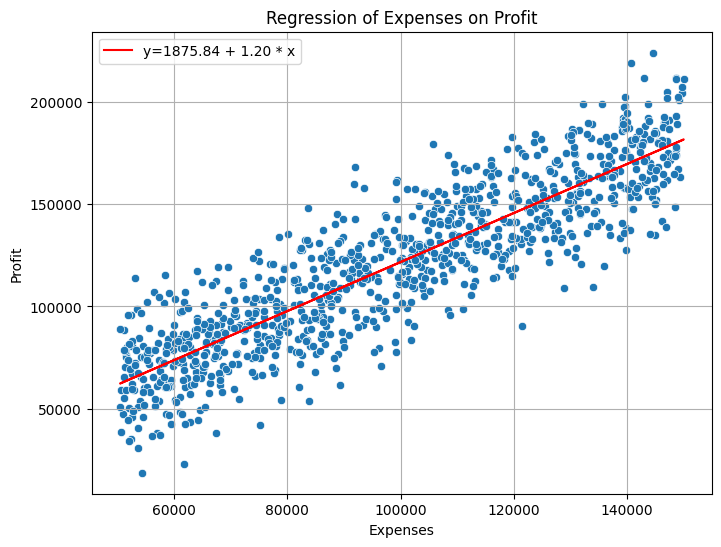


Regression Equation for Expenses (This single variable x):
Profit = 1875.84 + 1.20 * X

R-squared for Expenses: 0.7835
# -----------------------------------------------------

Profit = 1875.84 + 1.20 * 69420 = 85070.96341242461
Profit = 85070.96341242461


In [106]:
# Code from the instructor:
print("# ----------------- Code from instructor -------------------------")
X = df['Expenses']
Y = df['Profit']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

print("# -----------------------------------------------------", end="\n\n")


## Simple Scatter Plot V2

def show_scatter_plot(X_column, Y_column, dataframe):
  X = dataframe[X_column]
  Y = dataframe[Y_column]

  slope, intercept, r, p, std_err = stats.linregress(X, Y)

  def predict_where_x_is(X):
    return slope * X + intercept

  my_model = list(map(predict_where_x_is, X))

  plt.scatter(X, Y)
  plt.plot(X, my_model)
  plt.show()

# ----

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Simple Scatter Plot 

def showScatterPlotWithLinearReg(X_column, Y_column, df):
  X = df[[X_column]]
  Y = df[Y_column]

  # Fit the model
  model = LinearRegression().fit(X, Y)
  predictions = model.predict(X)

  # Create the scatterplot
  plt.figure(figsize=(8, 6))
  sns.scatterplot(data=df, x=X_column, y=Y_column)

  # Add the regression line
  intercept = model.intercept_
  coef = model.coef_[0]

  line = model.predict(df[[X_column]])
  plt.plot(df[X_column], line, 'r', label=f'y={intercept:.2f} + {coef:.2f} * x')

  print("# --------- Scatterplot Function ----------------------")
  plt.legend()
  plt.title(f'Regression of {X_column} on {Y_column}')
  plt.grid(True)
  plt.show()

  print(f"\nRegression Equation for {X_column} (This single variable x):")
  print(f"{Y_column} = {intercept:.2f} + {coef:.2f} * X")
  print(f"\nR-squared for {X_column}: {r2_score(Y, predictions):.4f}")
  print("# -----------------------------------------------------", end="\n\n")

def getTheYInTheLinearRegression(X_column, Y_column, df):
  X = df[[X_column]]
  Y = df[Y_column]

  # Fit the model
  model = LinearRegression().fit(X,Y)
  predictions = model.predict(X)

  # Get the Intercept and Coef
  intercept = model.intercept_
  coef = model.coef_[0]


  IsError = False
  XUserInput = 0
  while True:
    IsError = False
    try:
      temp = input("Input an X Value of Linear Regression Equation (escape to quit):")
      val = float(temp)
    except ValueError:
      IsError = True
      print("ERROR: Invalid input.")
    
    if not IsError:
      XUserInput = temp
      break
  Y = intercept + coef * float(XUserInput)

  print(f"{Y_column} = {intercept:.2f} + {coef:.2f} * {XUserInput} = {Y}")
  return Y  

# ----

print("Starting the Scatter Plot Function...")
showScatterPlotWithLinearReg("Expenses", "Profit", df)

print("Profit =", getTheYInTheLinearRegression("Expenses", "Profit", df))

# Guide Questions on Insights
1. What can you say About the Model?
2. Is It a Good Model?
3. What happens to Revenue when Expense increases according to the model?